<a href="https://colab.research.google.com/github/roshantac/EVA4/blob/master/Assignment12/A/Session12_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install albumentations

In [2]:
########################################
#  Calling  heavenly Gods
########################################
import torch
import torchvision
import torchvision.transforms as transforms
from dataset import *
from model import *
import torch.nn as nn
import torch.nn.functional as F
#from base_functions import *
from training import *
from torchsummary import summary
from TinyImgNet import *
# getting the data
trainloader, testloader = getData()



 Already downloaded
Starting data loading
Finished data loading, in 0.10078263282775879 seconds


In [3]:
# Utilize GPU if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = ResNet18().to(device) #().to(device) # #
if device == 'cuda':
    model = torch.nn.DataParallel(model)
    cudnn.benchmark = True

# Print Model Summary    
summary(model, input_size=(3, 64, 64))


cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           9,408
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
         MaxPool2d-4           [-1, 64, 16, 16]               0
            Conv2d-5           [-1, 64, 16, 16]          36,864
       BatchNorm2d-6           [-1, 64, 16, 16]             128
              ReLU-7           [-1, 64, 16, 16]               0
            Conv2d-8           [-1, 64, 16, 16]          36,864
       BatchNorm2d-9           [-1, 64, 16, 16]             128
             ReLU-10           [-1, 64, 16, 16]               0
       BasicBlock-11           [-1, 64, 16, 16]               0
           Conv2d-12           [-1, 64, 16, 16]          36,864
      BatchNorm2d-13           [-1, 64, 16, 16]             128
             ReLU-14           [-1


Learning rate search finished. See the graph with {finder_name}.plot()


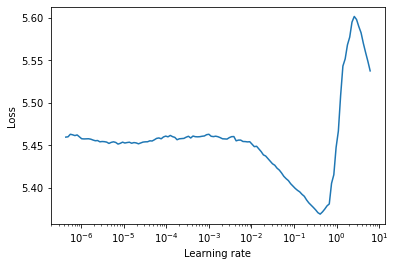

In [4]:
from lr_finder import LRFinder
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-7)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=10, num_iter=150)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [5]:
# Training starts here
Training(50,model,device, trainloader, testloader,.3 )


  0%|          | 0/154 [00:00<?, ?it/s]

EPOCH: 0


Loss=4.668075084686279 Batch_id=153 Accuracy=3.20: 100%|██████████| 154/154 [00:58<00:00,  2.61it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -1.6067, Accuracy: 2121/33000 (6.43%)

EPOCH: 1


Loss=4.160588264465332 Batch_id=153 Accuracy=9.04: 100%|██████████| 154/154 [00:58<00:00,  2.63it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -2.6589, Accuracy: 4132/33000 (12.52%)

EPOCH: 2


Loss=3.7925164699554443 Batch_id=153 Accuracy=14.31: 100%|██████████| 154/154 [00:58<00:00,  2.65it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -3.4310, Accuracy: 5061/33000 (15.34%)

EPOCH: 3


Loss=3.5621769428253174 Batch_id=153 Accuracy=19.11: 100%|██████████| 154/154 [00:58<00:00,  2.65it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -4.0649, Accuracy: 6888/33000 (20.87%)

EPOCH: 4


Loss=3.419900417327881 Batch_id=153 Accuracy=23.09: 100%|██████████| 154/154 [00:58<00:00,  2.64it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -4.1747, Accuracy: 7545/33000 (22.86%)

EPOCH: 5


Loss=3.0997557640075684 Batch_id=153 Accuracy=26.17: 100%|██████████| 154/154 [00:58<00:00,  2.64it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -4.7553, Accuracy: 7873/33000 (23.86%)

EPOCH: 6


Loss=3.143771171569824 Batch_id=153 Accuracy=29.69: 100%|██████████| 154/154 [00:58<00:00,  2.61it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -5.0597, Accuracy: 9134/33000 (27.68%)

EPOCH: 7


Loss=2.91709041595459 Batch_id=153 Accuracy=32.39: 100%|██████████| 154/154 [00:59<00:00,  2.59it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -5.4285, Accuracy: 9758/33000 (29.57%)

EPOCH: 8


Loss=2.7538113594055176 Batch_id=153 Accuracy=35.17: 100%|██████████| 154/154 [00:59<00:00,  2.59it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -5.5853, Accuracy: 9958/33000 (30.18%)

EPOCH: 9


Loss=2.739124298095703 Batch_id=153 Accuracy=37.19: 100%|██████████| 154/154 [00:58<00:00,  2.62it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -5.9301, Accuracy: 9979/33000 (30.24%)

EPOCH: 10


Loss=2.4850988388061523 Batch_id=153 Accuracy=40.26: 100%|██████████| 154/154 [00:59<00:00,  2.60it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -6.1720, Accuracy: 10070/33000 (30.52%)

EPOCH: 11


Loss=2.3162195682525635 Batch_id=153 Accuracy=43.30: 100%|██████████| 154/154 [00:58<00:00,  2.62it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -6.2774, Accuracy: 9992/33000 (30.28%)

EPOCH: 12


Loss=2.1858527660369873 Batch_id=153 Accuracy=45.96: 100%|██████████| 154/154 [00:58<00:00,  2.62it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -6.7633, Accuracy: 10513/33000 (31.86%)

EPOCH: 13


Loss=2.2724690437316895 Batch_id=153 Accuracy=48.54: 100%|██████████| 154/154 [00:58<00:00,  2.65it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -6.9067, Accuracy: 10493/33000 (31.80%)

EPOCH: 14


Loss=2.000664234161377 Batch_id=153 Accuracy=51.15: 100%|██████████| 154/154 [00:58<00:00,  2.62it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -7.2583, Accuracy: 10924/33000 (33.10%)

EPOCH: 15


Loss=1.939441442489624 Batch_id=153 Accuracy=53.88: 100%|██████████| 154/154 [00:57<00:00,  2.66it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -7.4426, Accuracy: 10926/33000 (33.11%)

EPOCH: 16


Loss=1.8378968238830566 Batch_id=153 Accuracy=56.67: 100%|██████████| 154/154 [00:58<00:00,  2.62it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -7.3667, Accuracy: 10394/33000 (31.50%)

EPOCH: 17


Loss=1.5894120931625366 Batch_id=153 Accuracy=59.60: 100%|██████████| 154/154 [00:57<00:00,  2.66it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -8.0917, Accuracy: 10665/33000 (32.32%)

EPOCH: 18


Loss=1.46061110496521 Batch_id=153 Accuracy=62.62: 100%|██████████| 154/154 [00:58<00:00,  2.64it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -8.1613, Accuracy: 10783/33000 (32.68%)

EPOCH: 19


Loss=1.4652223587036133 Batch_id=153 Accuracy=64.72: 100%|██████████| 154/154 [00:57<00:00,  2.66it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -8.5880, Accuracy: 10833/33000 (32.83%)

EPOCH: 20


Loss=1.3328962326049805 Batch_id=153 Accuracy=66.81: 100%|██████████| 154/154 [00:58<00:00,  2.65it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -8.9613, Accuracy: 10875/33000 (32.95%)

EPOCH: 21


Loss=1.1897112131118774 Batch_id=153 Accuracy=70.69: 100%|██████████| 154/154 [00:58<00:00,  2.65it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -9.4274, Accuracy: 10760/33000 (32.61%)

EPOCH: 22


Loss=0.9635104537010193 Batch_id=153 Accuracy=74.91: 100%|██████████| 154/154 [00:58<00:00,  2.65it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -10.0925, Accuracy: 10762/33000 (32.61%)

EPOCH: 23


Loss=0.8574543595314026 Batch_id=153 Accuracy=78.15: 100%|██████████| 154/154 [00:57<00:00,  2.67it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -10.4369, Accuracy: 10924/33000 (33.10%)

EPOCH: 24


Loss=0.7632977366447449 Batch_id=153 Accuracy=80.69: 100%|██████████| 154/154 [00:57<00:00,  2.69it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -10.6980, Accuracy: 11000/33000 (33.33%)

EPOCH: 25


Loss=0.6662574410438538 Batch_id=153 Accuracy=83.36: 100%|██████████| 154/154 [00:56<00:00,  2.74it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -11.2034, Accuracy: 10858/33000 (32.90%)

EPOCH: 26


Loss=0.5320519804954529 Batch_id=153 Accuracy=85.54: 100%|██████████| 154/154 [00:55<00:00,  2.75it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -11.6864, Accuracy: 11163/33000 (33.83%)

EPOCH: 27


Loss=0.44633275270462036 Batch_id=153 Accuracy=87.45: 100%|██████████| 154/154 [00:56<00:00,  2.75it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -11.9087, Accuracy: 11452/33000 (34.70%)

EPOCH: 28


Loss=0.4113166928291321 Batch_id=153 Accuracy=88.93: 100%|██████████| 154/154 [00:55<00:00,  2.77it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -12.1815, Accuracy: 11384/33000 (34.50%)

EPOCH: 29


Loss=0.4193183183670044 Batch_id=153 Accuracy=90.09: 100%|██████████| 154/154 [00:55<00:00,  2.78it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -12.6204, Accuracy: 11315/33000 (34.29%)

EPOCH: 30


Loss=0.3240690529346466 Batch_id=153 Accuracy=91.03: 100%|██████████| 154/154 [00:55<00:00,  2.77it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -13.0047, Accuracy: 11446/33000 (34.68%)

EPOCH: 31


Loss=0.3206275701522827 Batch_id=153 Accuracy=92.17: 100%|██████████| 154/154 [00:55<00:00,  2.76it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -13.3005, Accuracy: 11441/33000 (34.67%)

EPOCH: 32


Loss=0.26839718222618103 Batch_id=153 Accuracy=93.13: 100%|██████████| 154/154 [00:55<00:00,  2.75it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -13.4272, Accuracy: 11536/33000 (34.96%)

EPOCH: 33


Loss=0.20163382589817047 Batch_id=153 Accuracy=93.69: 100%|██████████| 154/154 [00:56<00:00,  2.75it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -13.4415, Accuracy: 11640/33000 (35.27%)

EPOCH: 34


Loss=0.1843973845243454 Batch_id=153 Accuracy=94.63: 100%|██████████| 154/154 [00:55<00:00,  2.76it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -13.8628, Accuracy: 11866/33000 (35.96%)

EPOCH: 35


Loss=0.24316786229610443 Batch_id=153 Accuracy=95.14: 100%|██████████| 154/154 [00:55<00:00,  2.76it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -14.1208, Accuracy: 11897/33000 (36.05%)

EPOCH: 36


Loss=0.1596221923828125 Batch_id=153 Accuracy=95.62: 100%|██████████| 154/154 [00:55<00:00,  2.75it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -14.0997, Accuracy: 11825/33000 (35.83%)

EPOCH: 37


Loss=0.15700069069862366 Batch_id=153 Accuracy=96.13: 100%|██████████| 154/154 [00:55<00:00,  2.76it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -14.5564, Accuracy: 12033/33000 (36.46%)

EPOCH: 38


Loss=0.101519875228405 Batch_id=153 Accuracy=96.49: 100%|██████████| 154/154 [00:56<00:00,  2.75it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -14.5688, Accuracy: 12005/33000 (36.38%)

EPOCH: 39


Loss=0.10290965437889099 Batch_id=153 Accuracy=96.99: 100%|██████████| 154/154 [00:56<00:00,  2.75it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -14.7443, Accuracy: 12094/33000 (36.65%)

EPOCH: 40


Loss=0.09620921313762665 Batch_id=153 Accuracy=97.16: 100%|██████████| 154/154 [00:55<00:00,  2.75it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -14.8896, Accuracy: 12122/33000 (36.73%)

EPOCH: 41


Loss=0.11972101032733917 Batch_id=153 Accuracy=97.44: 100%|██████████| 154/154 [00:55<00:00,  2.77it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -15.1587, Accuracy: 12159/33000 (36.85%)

EPOCH: 42


Loss=0.05785918980836868 Batch_id=153 Accuracy=97.71: 100%|██████████| 154/154 [00:55<00:00,  2.76it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -15.1548, Accuracy: 12240/33000 (37.09%)

EPOCH: 43


Loss=0.10574886947870255 Batch_id=153 Accuracy=97.82: 100%|██████████| 154/154 [00:56<00:00,  2.75it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -15.1952, Accuracy: 12155/33000 (36.83%)

EPOCH: 44


Loss=0.07431959360837936 Batch_id=153 Accuracy=98.09: 100%|██████████| 154/154 [00:55<00:00,  2.76it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -15.3883, Accuracy: 12285/33000 (37.23%)

EPOCH: 45


Loss=0.055574849247932434 Batch_id=153 Accuracy=98.22: 100%|██████████| 154/154 [00:55<00:00,  2.77it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -15.4011, Accuracy: 12323/33000 (37.34%)

EPOCH: 46


Loss=0.06695599853992462 Batch_id=153 Accuracy=98.35: 100%|██████████| 154/154 [00:55<00:00,  2.77it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -15.3664, Accuracy: 12326/33000 (37.35%)

EPOCH: 47


Loss=0.04833098128437996 Batch_id=153 Accuracy=98.50: 100%|██████████| 154/154 [00:56<00:00,  2.74it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -15.5135, Accuracy: 12338/33000 (37.39%)

EPOCH: 48


Loss=0.039542071521282196 Batch_id=153 Accuracy=98.62: 100%|██████████| 154/154 [00:55<00:00,  2.76it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -15.5768, Accuracy: 12336/33000 (37.38%)

EPOCH: 49


Loss=0.06866389513015747 Batch_id=153 Accuracy=98.71: 100%|██████████| 154/154 [00:55<00:00,  2.75it/s]



Test set: Average loss: -15.7638, Accuracy: 12440/33000 (37.70%)



In [0]:
# Calsswise accuracy 
#ClassTestAccuracy(testloader,device,model,classes)

In [0]:

#MissClassifedImage(testData,model,device,3,classes)

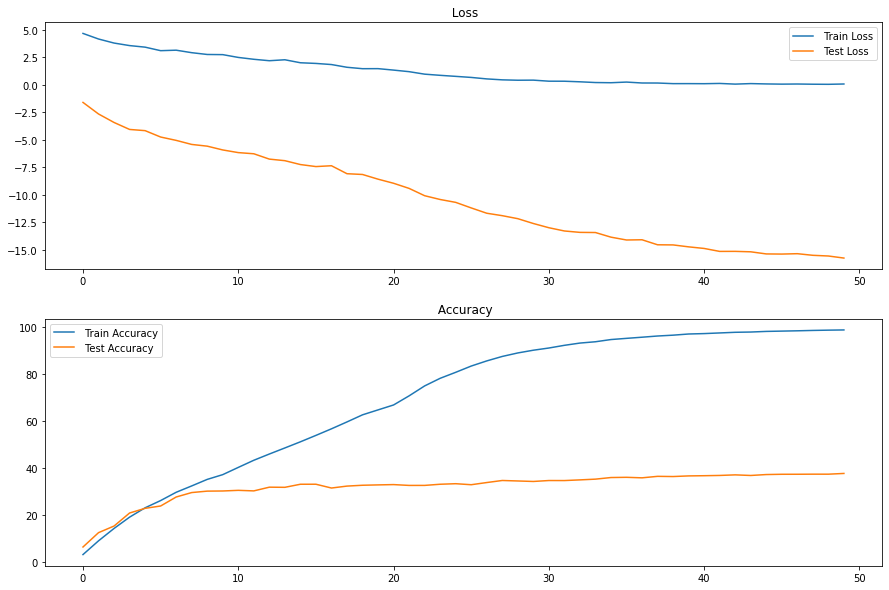

In [8]:
plotPerformanceGraph( )